In [58]:
%matplotlib notebook

In [59]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [60]:
# Import csv into DataFrame

tdot_df_raw = pd.read_csv("../Resources/Major_Crime_Indicators.csv")

tdot_df_raw

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,cleared,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.850398e+06,5.429359e+06,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,Friday,11,NO,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8.818405e+06,5.436836e+06,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,Friday,14,NO,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8.853791e+06,5.402071e+06,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,Friday,13,NO,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8.832822e+06,5.419628e+06,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,Friday,12,YES,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8.853452e+06,5.410706e+06,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,Friday,14,NO,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301228,-8.844901e+06,5.433057e+06,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,179.0,Tuesday,20,NO,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8.820395e+06,5.430803e+06,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,179.0,Tuesday,21,NO,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8.825525e+06,5.429271e+06,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,140.0,Friday,12,YES,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000000e+00,0.000000e+00,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,180.0,Wednesday,0,NO,Auto Theft,NSA,NSA,0.000000,0.000000,301232


In [61]:
# Clean Data

# Remove unneccessary columns

tdot_df = tdot_df_raw[['premises_type','occurrenceyear', 'occurrencemonth','occurrencedayofweek','occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude',
       'Latitude','ObjectId']]

tdot_df

,premises_type,occurrenceyear,occurrencemonth,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,Apartment,2014.0,January,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,House,2014.0,January,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,Outside,2014.0,January,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,Commercial,2014.0,January,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,Commercial,2014.0,January,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...
301228,House,2022.0,June,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,Outside,2022.0,June,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,Commercial,2022.0,May,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,Outside,2022.0,June,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232


In [62]:
# Convert NSA values to NaN

tdot_df_drp = tdot_df.replace("NSA",np.nan)

# Remove rows with incomplete data

tdot_df_drp = tdot_df_drp.dropna().reset_index(drop=True)

print(f"The total number of rows dropped is: {len(tdot_df.index)-len(tdot_df_drp.index)}")

tdot_df_drp

The total number of rows dropped is: 5027


,premises_type,occurrenceyear,occurrencemonth,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,Apartment,2014.0,January,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,House,2014.0,January,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,Outside,2014.0,January,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,Commercial,2014.0,January,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,Commercial,2014.0,January,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...
296201,House,2022.0,June,Tuesday,23,Auto Theft,60,Woodbine-Lumsden,-79.308515,43.695118,301228
296202,House,2022.0,June,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
296203,Outside,2022.0,June,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
296204,Commercial,2022.0,May,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231


In [63]:
# Groupby Month

occurrencemonth_count=tdot_df_drp.groupby(['occurrencemonth']).count()['ObjectId']
occurrencemonth_count

occurrencemonth
April        24699
August       24472
December     22750
February     22457
January      25189
July         24785
June         27025
March        25070
May          27001
November     23827
October      24880
September    24051
Name: ObjectId, dtype: int64

<IPython.core.display.Javascript object>


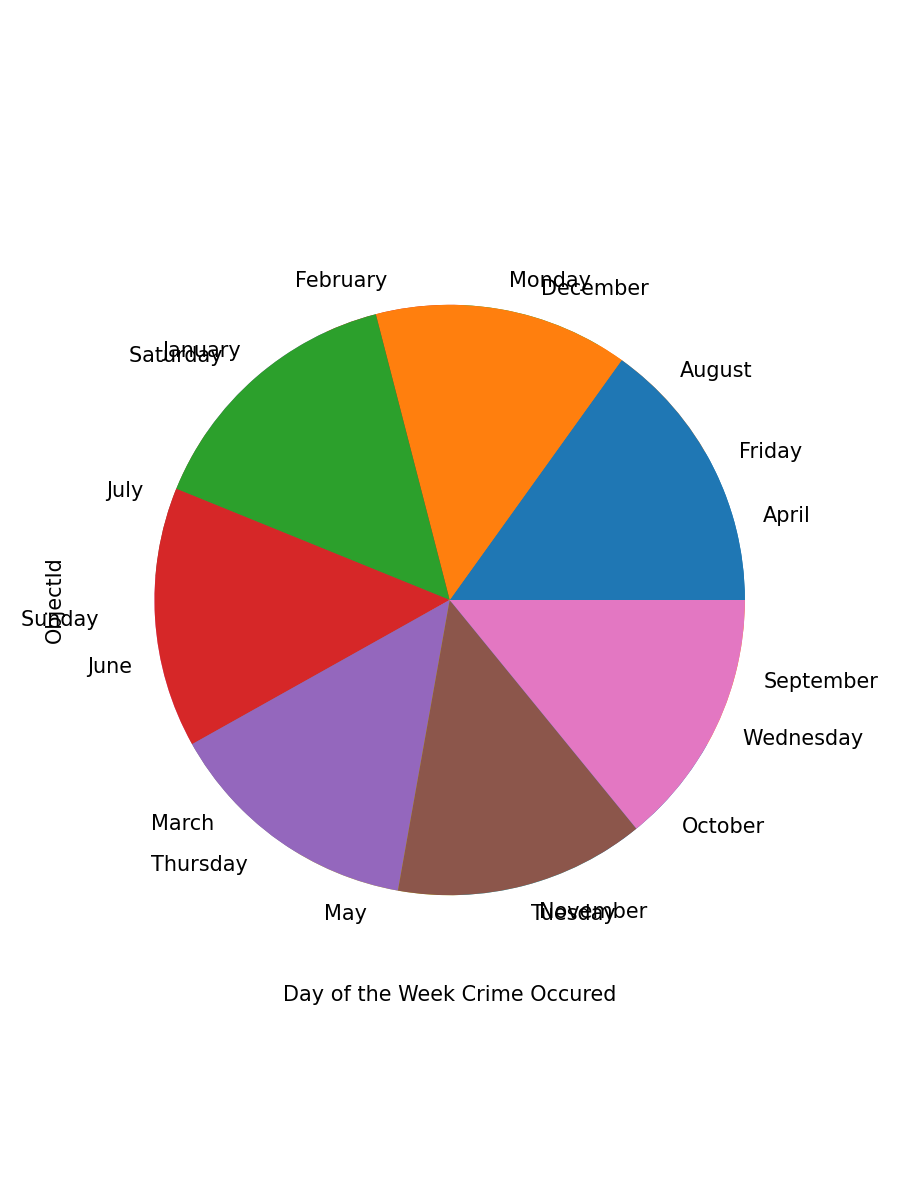

In [64]:
# Create a bar chart based off of the group series from before

occurrencemonth_chart = occurrencemonth_count.plot(kind='pie', figsize=(6,8))

# Set the xlabel and ylabel using class methods
occurrencemonth_chart.set_xlabel("Month Crime Occured")
occurrencemonth_chart.set_ylabel("Number of Crime")

plt.show()
plt.tight_layout()

In [65]:
# Groupby Week
occurrenceweek_count=tdot_df_drp.groupby(['occurrencedayofweek']).count()['ObjectId']
occurrenceweek_count

occurrencedayofweek
Friday        44731
Monday        41245
Saturday      43918
Sunday        42267
Thursday      41681
Tuesday       40587
Wednesday     41777
Name: ObjectId, dtype: int64

In [66]:
# Create a bar chart based off of the group series from before

occurrenceweek_chart = occurrenceweek_count.plot(kind='pie', figsize=(6,8))

# Set the xlabel and ylabel using class methods
occurrenceweek_chart.set_xlabel("Day of the Week Crime Occured")

plt.show()
plt.tight_layout()

In [67]:
# Groupby Year and Neighbourhood

crime_nhood_count=tdot_df_drp.groupby(by=['Neighbourhood']).count()['mci_category']
crime_nhood_count=pd.DataFrame(crime_nhood_count)
crime_nhood_count

,mci_category
Neighbourhood,
Agincourt North,1561
Agincourt South-Malvern West,2344
Alderwood,835
Annex,4680
Banbury-Don Mills,1669
...,...
Wychwood,1159
Yonge-Eglinton,1153
Yonge-St.Clair,596


In [68]:
#Top 10 highest crime happened in which neighbourhood and what year?
top10_crime_nhood_count=crime_nhood_count['mci_category'].nlargest(n=10)
top10_crime_nhood_count=pd.DataFrame(top10_crime_nhood_count)
top10_crime_nhood_count

,mci_category
Neighbourhood,
Waterfront Communities-The Island,11302
Church-Yonge Corridor,9940
Bay Street Corridor,8522
West Humber-Clairville,8102
Moss Park,7285
York University Heights,5889
Downsview-Roding-CFB,5730
Kensington-Chinatown,5707
Woburn,5351


<IPython.core.display.Javascript object>


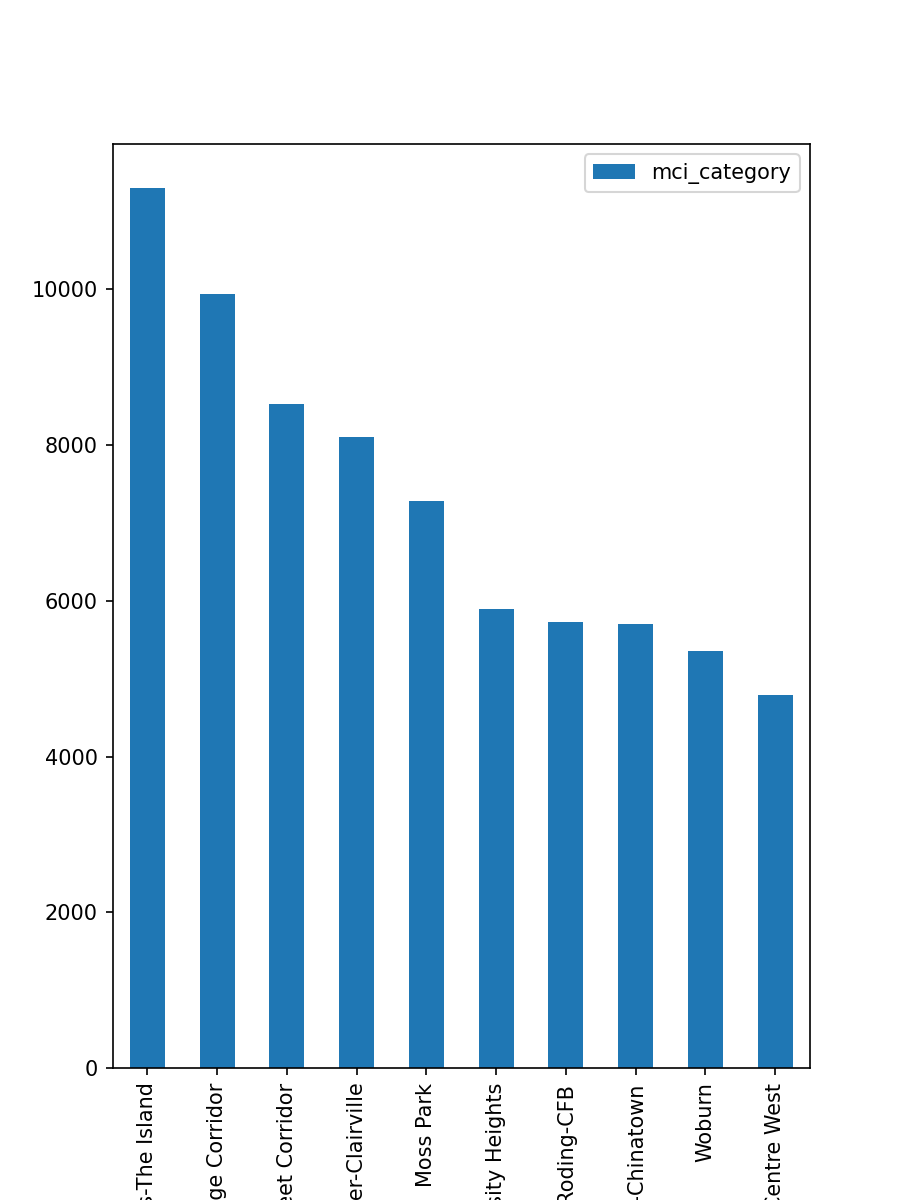

NameError: name 'top10_crime_nhood_count_chart' is not defined

In [69]:
# Create a bar chart based off of the group series from before
top10_crime_nhood_chart = top10_crime_nhood_count.plot(kind='bar', figsize=(6,8))
# Set the xlabel and ylabel using class methods
top10_crime_nhood_chart.set_xlabel("Neighborhood")
top10_crime_nhood_count_chart.set_ylabel("Number of Crime")

plt.show()
plt.tight_layout()

In [70]:
#Top 10 lowest crime happened in which neighbourhood and what year?
top10_min_crime_nhood_count=crime_nhood_count['mci_category'].nsmallest(n=10)
top10_min_crime_nhood_count=pd.DataFrame(top10_min_crime_nhood_count)
top10_min_crime_nhood_count

,mci_category
Neighbourhood,
Lambton Baby Point,472
Woodbine-Lumsden,545
Maple Leaf,550
Guildwood,558
Yonge-St.Clair,596
Markland Wood,629
Centennial Scarborough,687
Humber Heights-Westmount,703
Princess-Rosethorn,715


<IPython.core.display.Javascript object>


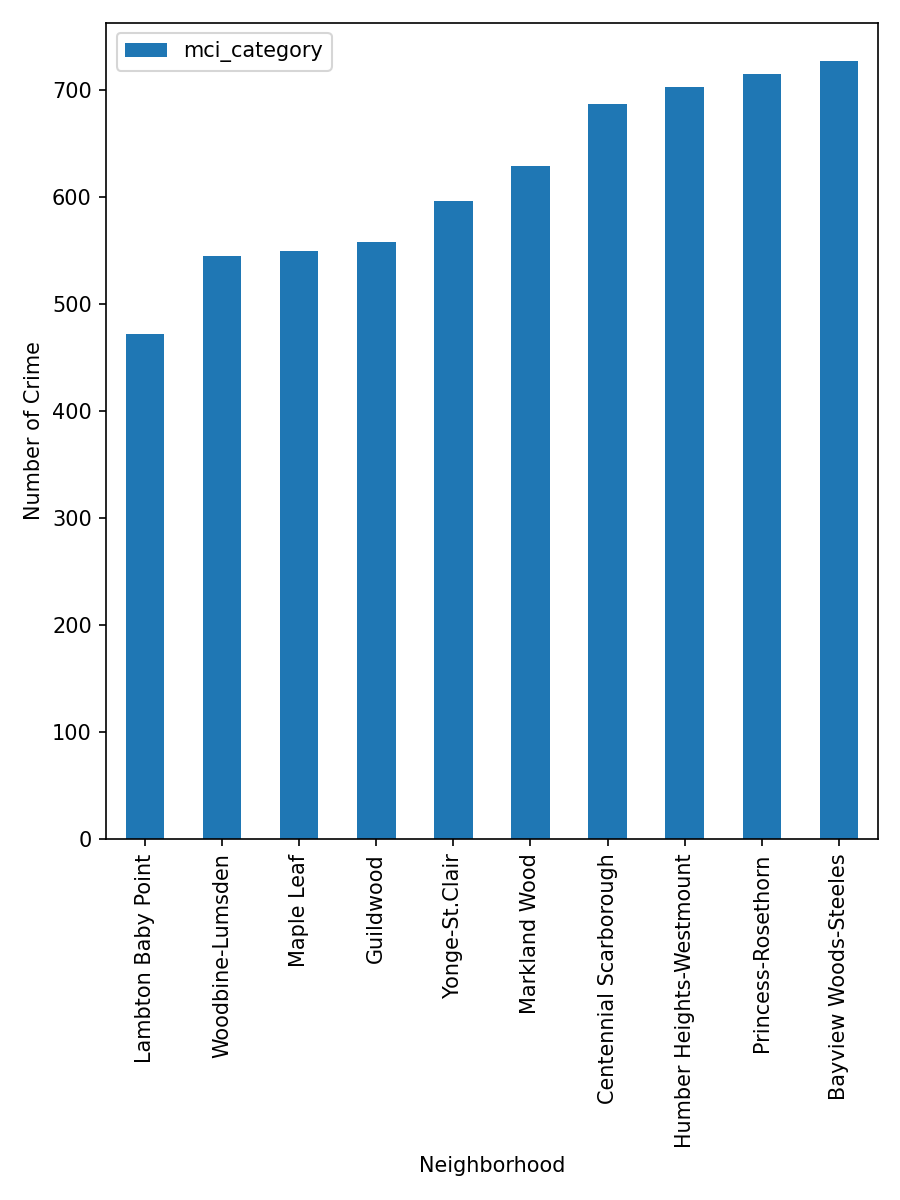

In [71]:
# Create a bar chart based off of the group series from before

top10_min_crime_nhood_chart = top10_min_crime_nhood_count.plot(kind='bar', figsize=(6,8))
# Set the xlabel and ylabel using class methods
top10_min_crime_nhood_chart.set_xlabel("Neighborhood")
top10_min_crime_nhood_chart.set_ylabel("Number of Crime")

plt.show()
plt.tight_layout()

In [72]:
crimetype_count=tdot_df_drp.groupby(['mci_category']).count()['ObjectId']
crimetype_count

mci_category
Assault            158880
Auto Theft          40326
Break and Enter     58974
Robbery             28296
Theft Over           9730
Name: ObjectId, dtype: int64

<IPython.core.display.Javascript object>


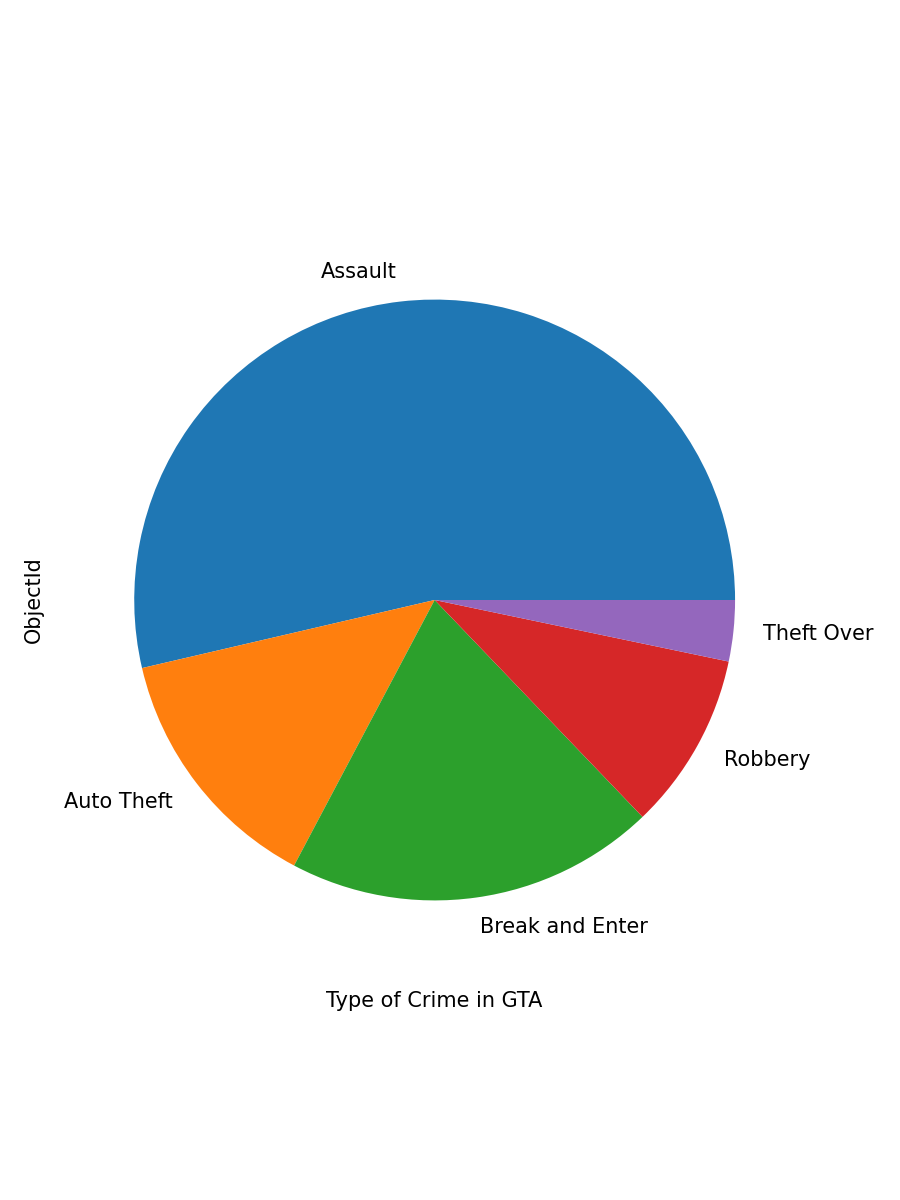

In [73]:
# Create a pie chart based off of the group series from before
%matplotlib notebook
crimetype_chart = crimetype_count.plot(kind='pie', figsize=(6,8))

# Set the xlabel and ylabel using class methods
crimetype_chart.set_xlabel("Type of Crime in GTA")

plt.show()
plt.tight_layout()

In [74]:
new_df=tdot_df_drp.groupby(["occurrenceyear"]).count()["mci_category"]
new_df=pd.DataFrame(new_df)
new_df

,mci_category
occurrenceyear,
2000.0,23
2001.0,21
2002.0,16
2003.0,15
2004.0,26
2005.0,24
2006.0,11
2007.0,28
2008.0,44


<IPython.core.display.Javascript object>


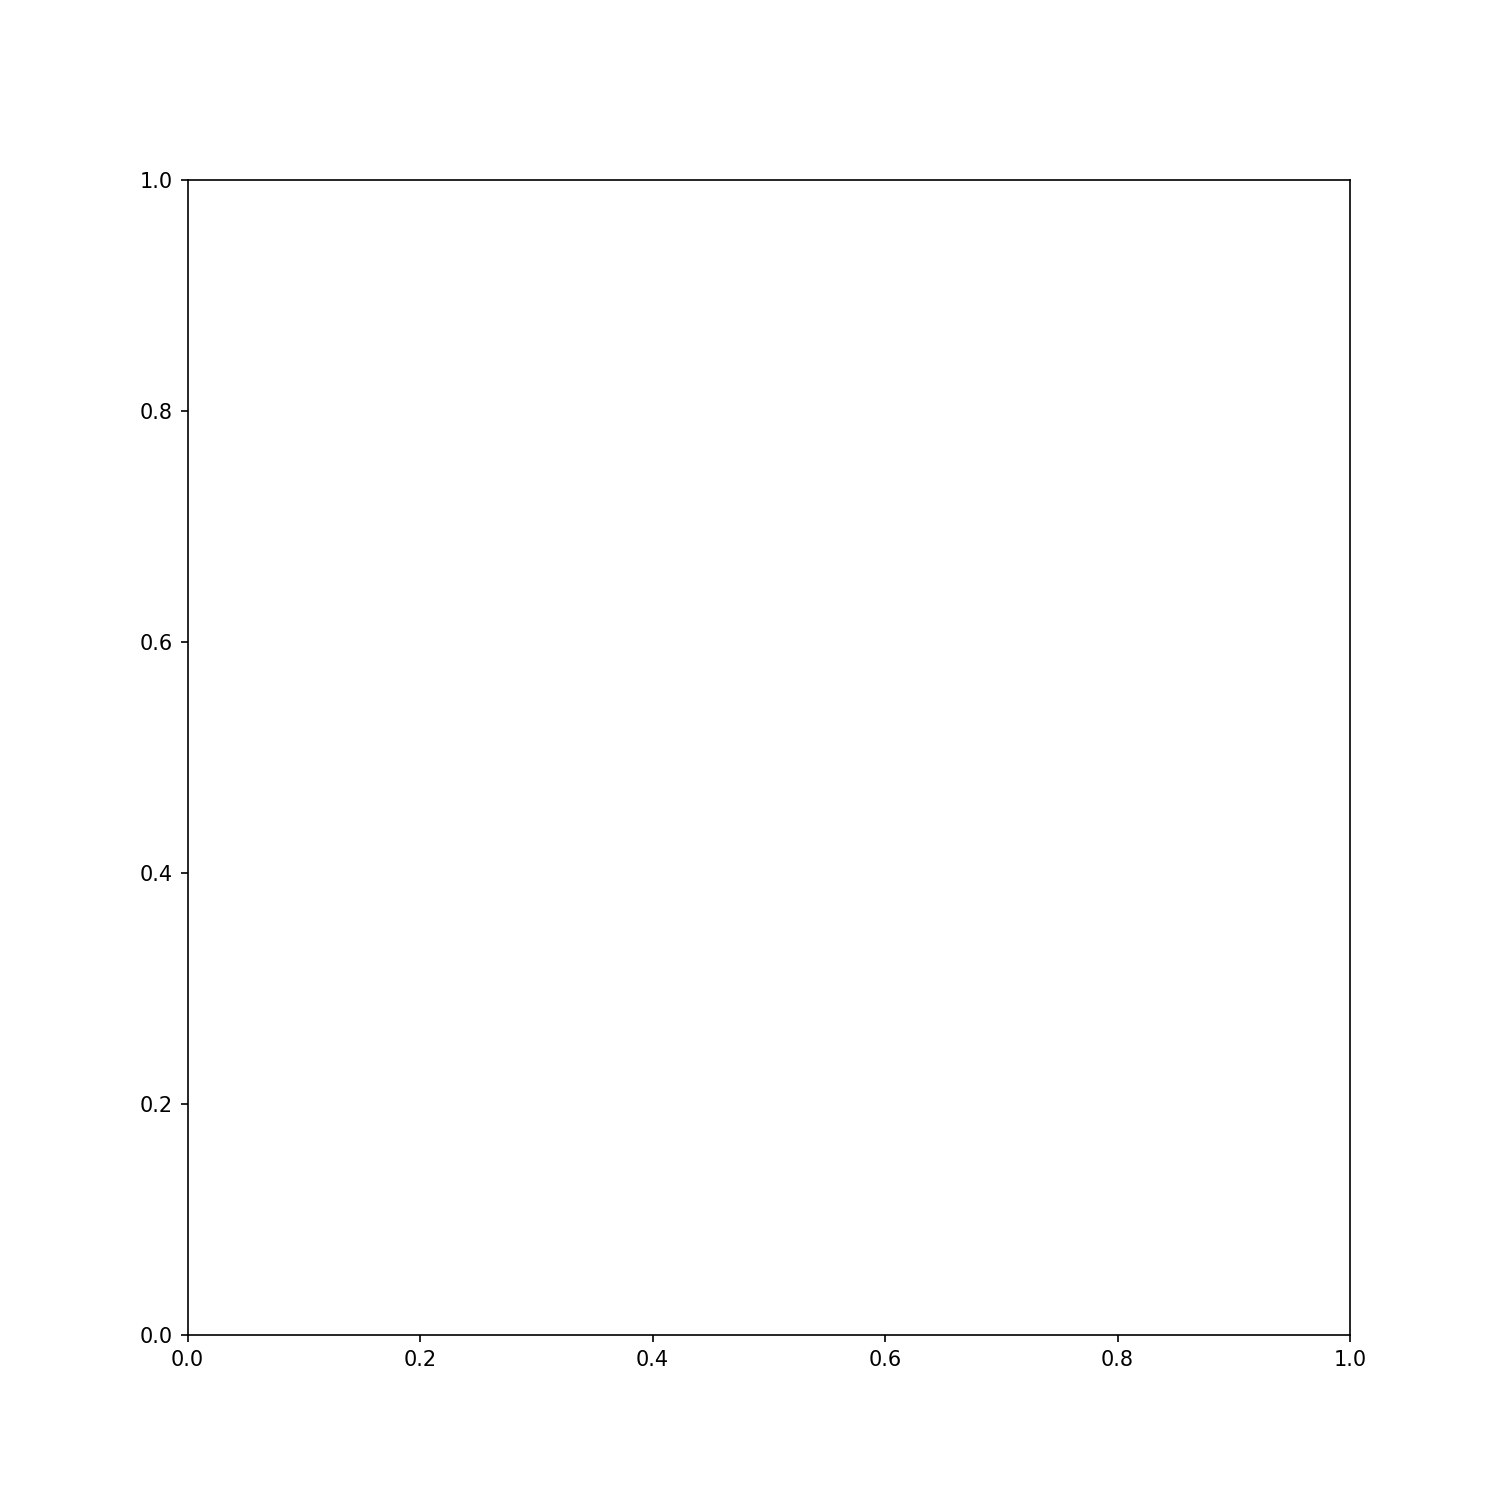

KeyError: 'occurrenceyear'

In [79]:
new_df.plot(kind="scatter", x="mci_category", y="occurrenceyear", grid=True, figsize=(10,10),
              title="Year Vs. Number of Crime")
plt.show()